In [56]:
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt
import torch
import networkx as nx
from torch_geometric.utils import to_networkx
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
import seaborn as sns
import plotly.graph_objects as go
from skimage import data
from skimage import color
from scipy.linalg import svd
import matplotlib.pyplot as plt
from scipy.linalg import svd
import numpy as np
from scipy.linalg import lu #explore linalg folder more later
import inspect

In [37]:
def adjacency_matrix_sparse(edges, n):
    """Create sparse adjacency matrix from edges and number of nodes."""
    row = [edge[0] for edge in edges] + [edge[1] for edge in edges]
    col = [edge[1] for edge in edges] + [edge[0] for edge in edges]
    data = [1] * (2 * len(edges))
    return sparse.csr_matrix((data, (row, col)), shape=(n, n))

def laplacian_matrix_sparse(adj_matrix):
    """Calculate sparse Laplacian matrix from sparse adjacency matrix."""
    D = degree_matrix_sparse(adj_matrix)
    L = D - adj_matrix
    return L

def degree_matrix_sparse(adj_matrix):
    """Return sparse degree matrix for the given sparse adjacency matrix."""
    degrees = np.array(adj_matrix.sum(axis=1)).flatten()
    return sparse.diags(degrees)

In [38]:
edges = [(0, 1), (0, 2), (1, 2), (1, 3)]
n = 4
A = adjacency_matrix_sparse(edges, n)
L = laplacian_matrix_sparse(A)
D = degree_matrix_sparse(A)

print("Adjacency Matrix:\n", A)
print("Degree Matrix:\n", D)
print("Laplacian Matrix:\n", L)

Adjacency Matrix:
 <Compressed Sparse Row sparse matrix of dtype 'int64'
	with 8 stored elements and shape (4, 4)>
  Coords	Values
  (0, 1)	1
  (0, 2)	1
  (1, 0)	1
  (1, 2)	1
  (1, 3)	1
  (2, 0)	1
  (2, 1)	1
  (3, 1)	1
Degree Matrix:
 <DIAgonal sparse matrix of dtype 'float64'
	with 4 stored elements (1 diagonals) and shape (4, 4)>
  Coords	Values
  (0, 0)	2.0
  (1, 1)	3.0
  (2, 2)	2.0
  (3, 3)	1.0
Laplacian Matrix:
 <Compressed Sparse Row sparse matrix of dtype 'float64'
	with 12 stored elements and shape (4, 4)>
  Coords	Values
  (0, 0)	2.0
  (0, 1)	-1.0
  (0, 2)	-1.0
  (1, 0)	-1.0
  (1, 1)	3.0
  (1, 2)	-1.0
  (1, 3)	-1.0
  (2, 0)	-1.0
  (2, 1)	-1.0
  (2, 2)	2.0
  (3, 1)	-1.0
  (3, 3)	1.0


Adjacency Matrix: 
- for an adjacency matrix representing an undirected graph. The matrix is symmetric about the diagonal, meaning the upper triangular part of the matrix (above the diagonal) is a mirror reflection of the lower triangular part (below the diagonal). 

- Nodes 0 and 1 are adjacent (as indicated by the -1 at positions (0,1) and (1,0)).
- Nodes 0 and 2 are adjacent.
- Nodes 1 and 2 are adjacent.
- Nodes 1 and 3 are adjacent.

Degree Matrix:

- Node 0 has a degree of 2.
- Node 1 has a degree of 3.
- Node 2 has a degree of 2.
- Node 3 has a degree of 1.

Laplacian Matrix:

- Node 0 is connected to Nodes 1 and 2 (corresponding to -1 at (0,1) and (0,2)).
- Node 1 is connected to Nodes 0, 2, and 3 (corresponding to -1 at (1,0), (1,2), and (1,3)).
- Node 2 is connected to Nodes 0 and 1 (corresponding to -1 at (2,0) and (2,1)).
- Node 3 is connected only to Node 1 (corresponding to -1 at (3,1)).

- we just look at the Laplacian horizontally, for example at Row 0 (Node 0), we see -1 at position 1 and 2, therefore Node 0 is connected to Node 1 and Node 2



Laplacian matrix shape: (100000, 100000)
Laplacian matrix number of non-zero elements: 1099948


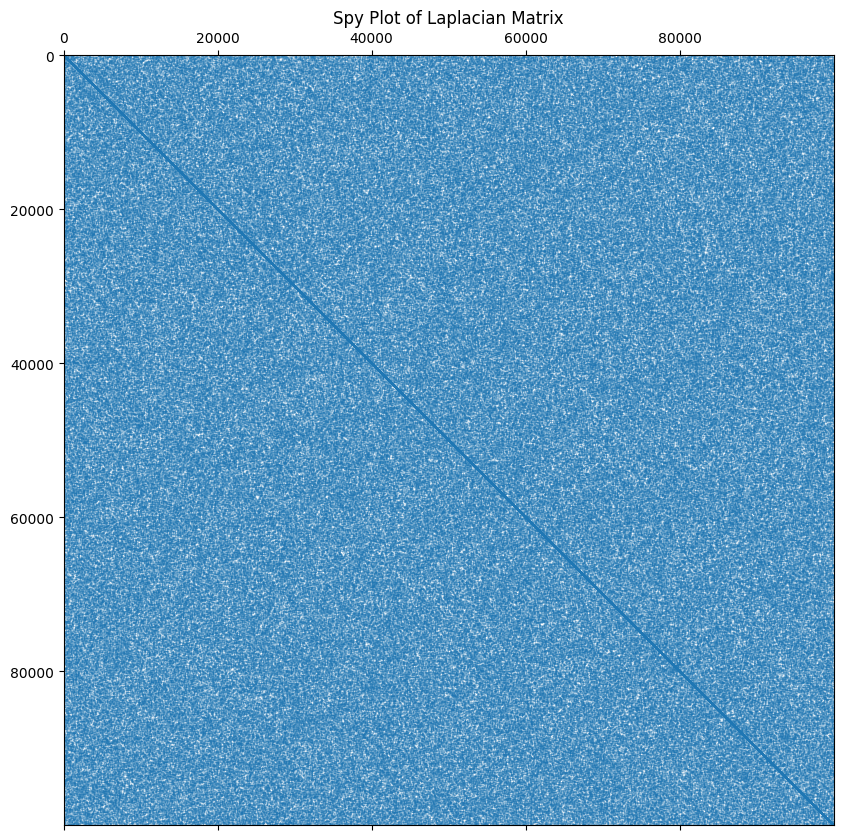

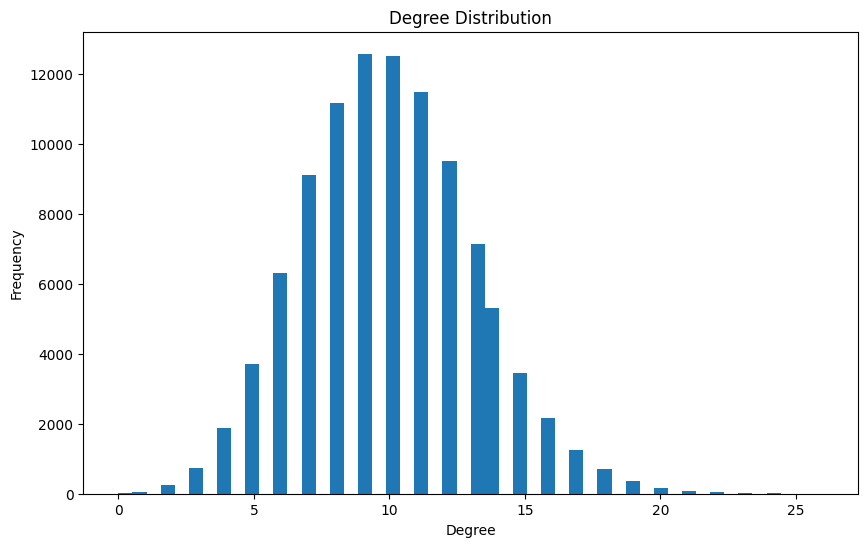

Number of edges: 500000
Mean edge weight: 1.0000
Median edge weight: 1.0000
Min edge weight: 1.0000
Max edge weight: 1.0000


In [39]:
# large graph (at least for my computer lol)
n = 100000
m = 500000

np.random.seed(42)
edges = [(np.random.randint(0, n), np.random.randint(0, n)) for _ in range(m)]
edge_weights = [1] * len(edges)
A_sparse = adjacency_matrix_sparse(edges, n)
L_sparse = laplacian_matrix_sparse(A_sparse)

print(f"Laplacian matrix shape: {L_sparse.shape}")
print(f"Laplacian matrix number of non-zero elements: {L_sparse.nnz}")
plt.figure(figsize=(10, 10))
plt.spy(L_sparse, markersize=0.1)
plt.title("Spy Plot of Laplacian Matrix")
plt.show()

degrees = L_sparse.diagonal()
plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=50)
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()

print(f"Number of edges: {len(edge_weights)}")
print(f"Mean edge weight: {np.mean(edge_weights):.4f}")
print(f"Median edge weight: {np.median(edge_weights):.4f}")
print(f"Min edge weight: {np.min(edge_weights):.4f}")
print(f"Max edge weight: {np.max(edge_weights):.4f}")

In [40]:
from torch_geometric.datasets import Planetoid

dataset = Planetoid(root='/tmp/Cora', name='Cora')
data = dataset[0]

print(f"Dataset: {dataset}")
print(f"Number of nodes: {data.num_nodes}")
print(f"Number of edges: {data.num_edges}")
print(f"Number of features: {data.num_node_features}")
print(f"Number of classes: {dataset.num_classes}")

Dataset: Cora()
Number of nodes: 2708
Number of edges: 10556
Number of features: 1433
Number of classes: 7


In [41]:
print(data)
print("Edge index:", data.edge_index)
print("Node features shape:", data.x.shape)
print("Node labels shape:", data.y.shape)

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])
Edge index: tensor([[ 633, 1862, 2582,  ...,  598, 1473, 2706],
        [   0,    0,    0,  ..., 2707, 2707, 2707]])
Node features shape: torch.Size([2708, 1433])
Node labels shape: torch.Size([2708])


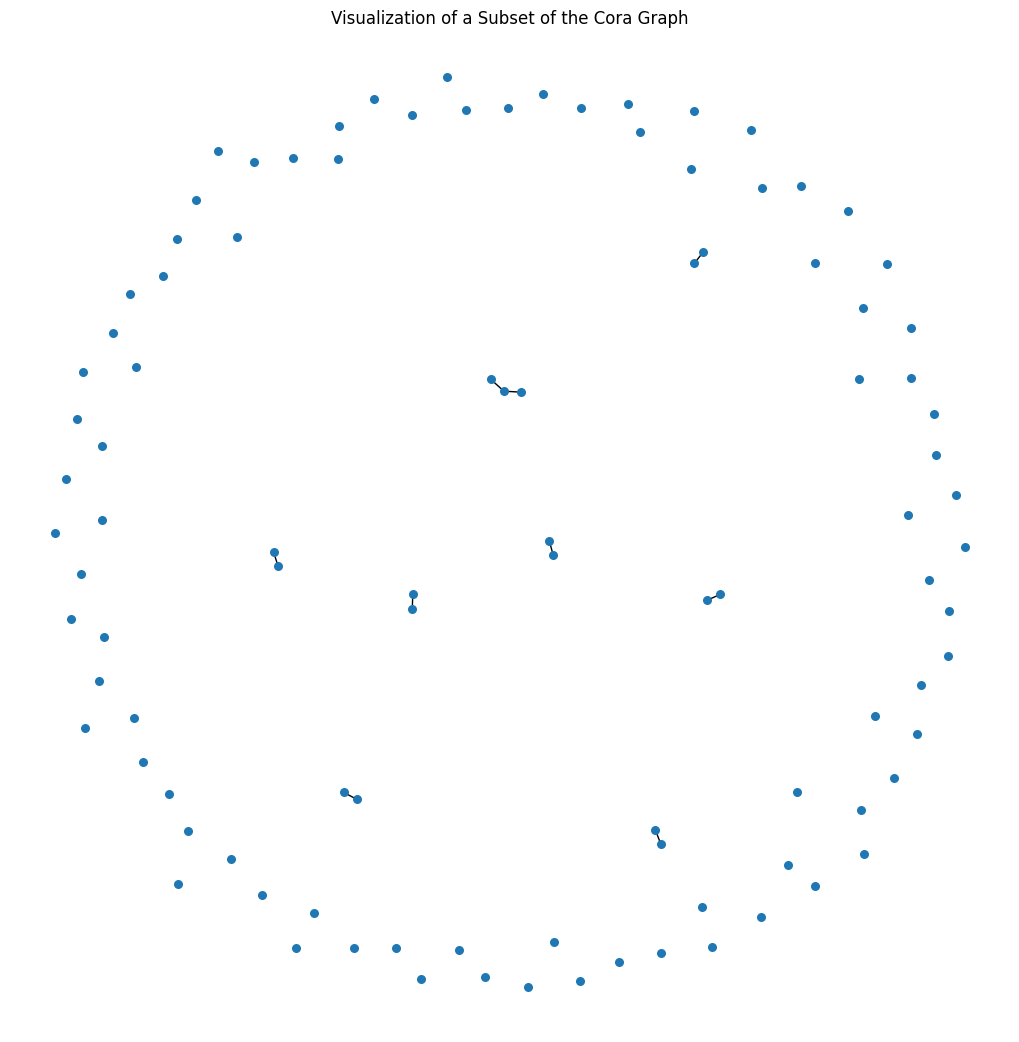

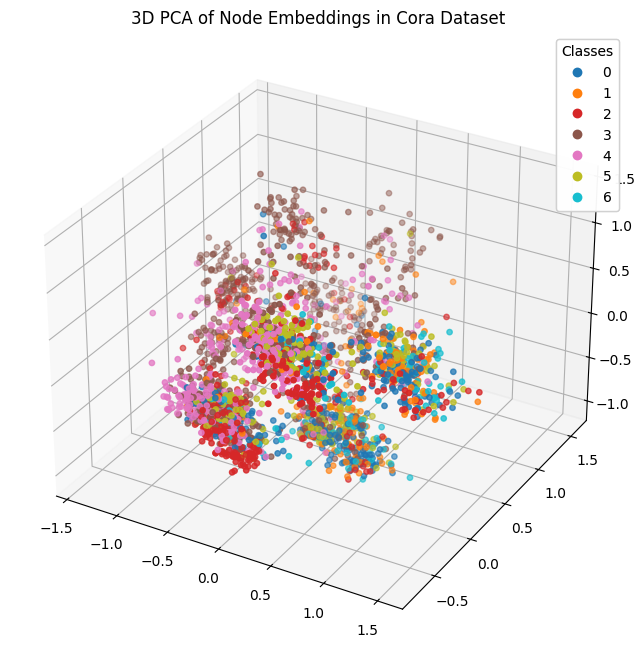

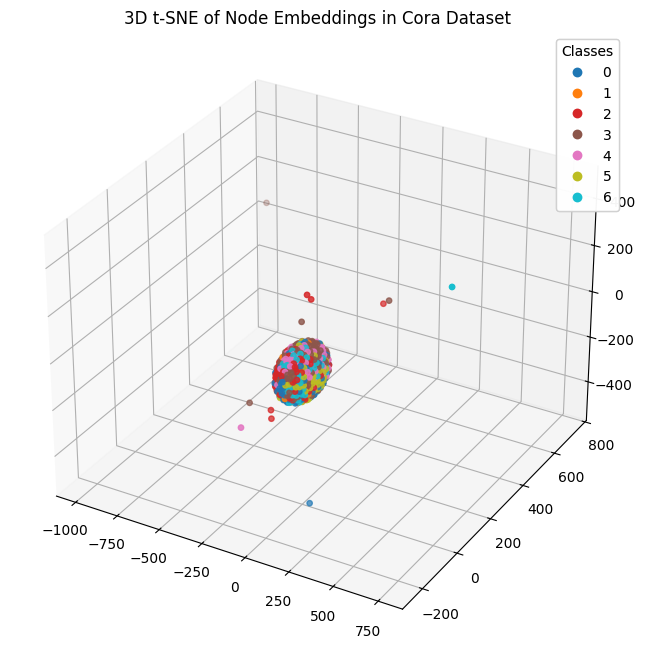

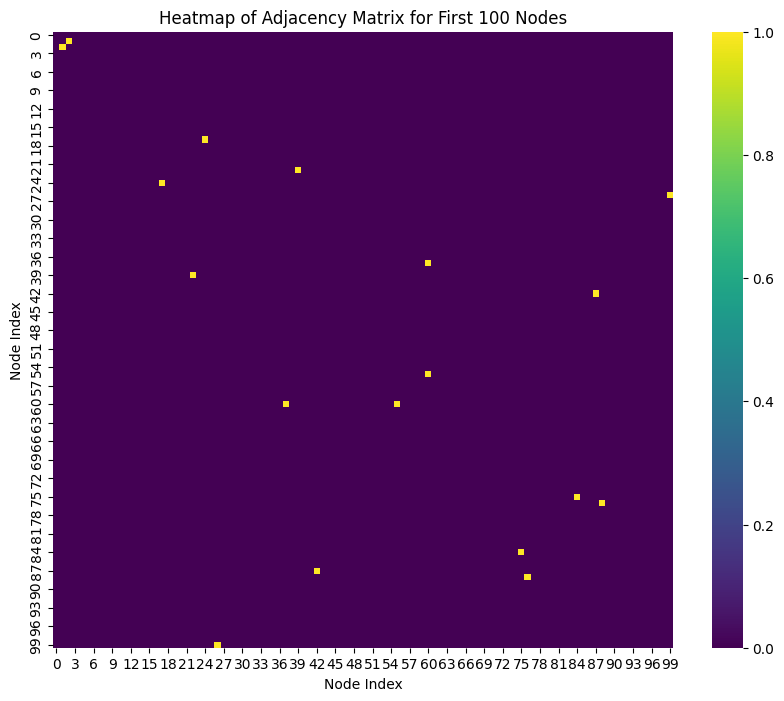

ValueError: 
    Invalid element(s) received for the 'color' property of scatter3d.marker
        Invalid elements include: [tensor(3), tensor(4), tensor(4), tensor(0), tensor(3), tensor(2), tensor(0), tensor(3), tensor(3), tensor(2)]

    The 'color' property is a color and may be specified as:
      - A hex string (e.g. '#ff0000')
      - An rgb/rgba string (e.g. 'rgb(255,0,0)')
      - An hsl/hsla string (e.g. 'hsl(0,100%,50%)')
      - An hsv/hsva string (e.g. 'hsv(0,100%,100%)')
      - A named CSS color:
            aliceblue, antiquewhite, aqua, aquamarine, azure,
            beige, bisque, black, blanchedalmond, blue,
            blueviolet, brown, burlywood, cadetblue,
            chartreuse, chocolate, coral, cornflowerblue,
            cornsilk, crimson, cyan, darkblue, darkcyan,
            darkgoldenrod, darkgray, darkgrey, darkgreen,
            darkkhaki, darkmagenta, darkolivegreen, darkorange,
            darkorchid, darkred, darksalmon, darkseagreen,
            darkslateblue, darkslategray, darkslategrey,
            darkturquoise, darkviolet, deeppink, deepskyblue,
            dimgray, dimgrey, dodgerblue, firebrick,
            floralwhite, forestgreen, fuchsia, gainsboro,
            ghostwhite, gold, goldenrod, gray, grey, green,
            greenyellow, honeydew, hotpink, indianred, indigo,
            ivory, khaki, lavender, lavenderblush, lawngreen,
            lemonchiffon, lightblue, lightcoral, lightcyan,
            lightgoldenrodyellow, lightgray, lightgrey,
            lightgreen, lightpink, lightsalmon, lightseagreen,
            lightskyblue, lightslategray, lightslategrey,
            lightsteelblue, lightyellow, lime, limegreen,
            linen, magenta, maroon, mediumaquamarine,
            mediumblue, mediumorchid, mediumpurple,
            mediumseagreen, mediumslateblue, mediumspringgreen,
            mediumturquoise, mediumvioletred, midnightblue,
            mintcream, mistyrose, moccasin, navajowhite, navy,
            oldlace, olive, olivedrab, orange, orangered,
            orchid, palegoldenrod, palegreen, paleturquoise,
            palevioletred, papayawhip, peachpuff, peru, pink,
            plum, powderblue, purple, red, rosybrown,
            royalblue, rebeccapurple, saddlebrown, salmon,
            sandybrown, seagreen, seashell, sienna, silver,
            skyblue, slateblue, slategray, slategrey, snow,
            springgreen, steelblue, tan, teal, thistle, tomato,
            turquoise, violet, wheat, white, whitesmoke,
            yellow, yellowgreen
      - A number that will be interpreted as a color
        according to scatter3d.marker.colorscale
      - A list or array of any of the above

In [42]:
G = to_networkx(data, to_undirected=True)

subgraph = G.subgraph(list(G.nodes)[:100])

plt.figure(figsize=(10, 10))
nx.draw(subgraph, node_size=30, with_labels=False)
plt.title("Visualization of a Subset of the Cora Graph")
plt.show()


pca = PCA(n_components=3)
node_embeddings = pca.fit_transform(data.x.numpy())
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(node_embeddings[:, 0], node_embeddings[:, 1], node_embeddings[:, 2],
                     c=data.y.numpy(), cmap="tab10", s=15)
legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend1)
plt.title("3D PCA of Node Embeddings in Cora Dataset")
plt.show()

tsne = TSNE(n_components=3, perplexity=30, learning_rate=200)
node_embeddings_tsne = tsne.fit_transform(data.x.numpy())

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(node_embeddings_tsne[:, 0], node_embeddings_tsne[:, 1], node_embeddings_tsne[:, 2],
                     c=data.y.numpy(), cmap="tab10", s=15)
legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend1)
plt.title("3D t-SNE of Node Embeddings in Cora Dataset")
plt.show()


adj_matrix = data.edge_index.numpy()
subset_nodes = 100  
subset_adj_matrix = nx.to_numpy_array(G.subgraph(range(subset_nodes)))
plt.figure(figsize=(10, 8))
sns.heatmap(subset_adj_matrix, cmap="viridis")
plt.title("Heatmap of Adjacency Matrix for First 100 Nodes")
plt.xlabel("Node Index")
plt.ylabel("Node Index")
plt.show()


G_sub = G.subgraph(list(G.nodes)[:100])
pos_3d = nx.spring_layout(G_sub, dim=3, seed=42)
x_nodes, y_nodes, z_nodes = zip(*[pos_3d[node] for node in G_sub.nodes])
edges_x, edges_y, edges_z = [], [], []

for edge in G_sub.edges:
    x0, y0, z0 = pos_3d[edge[0]]
    x1, y1, z1 = pos_3d[edge[1]]
    edges_x += [x0, x1, None]
    edges_y += [y0, y1, None]
    edges_z += [z0, z1, None]

fig = go.Figure()
fig.add_trace(go.Scatter3d(x=edges_x, y=edges_y, z=edges_z, mode='lines', line=dict(color='gray', width=0.5)))
fig.add_trace(go.Scatter3d(x=x_nodes, y=y_nodes, z=z_nodes, mode='markers',
                           marker=dict(size=5, color=list(data.y[:100]), colorscale="Viridis", opacity=0.8)))
fig.update_layout(title="3D Force-Directed Layout of Cora Subgraph", showlegend=False)
fig.show()

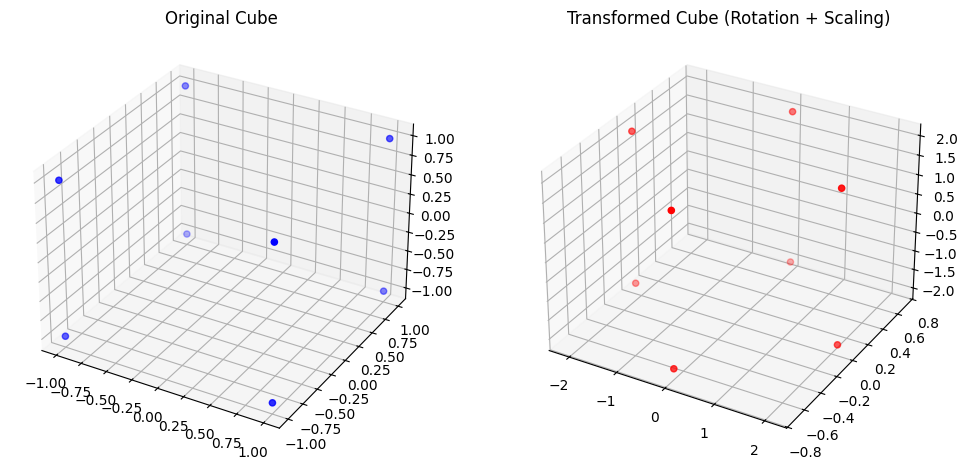

In [44]:
cube_points = np.array([
    [1, 1, 1], [-1, 1, 1], [-1, -1, 1], [1, -1, 1],
    [1, 1, -1], [-1, 1, -1], [-1, -1, -1], [1, -1, -1]
])
theta = np.pi / 4  # 45 degrees
rotation_matrix = np.array([
    [np.cos(theta), -np.sin(theta), 0],
    [np.sin(theta), np.cos(theta), 0],
    [0, 0, 1]
])

scaling_matrix = np.diag([1.5, 0.5, 2])
rotated_points = cube_points @ rotation_matrix.T
scaled_points = rotated_points @ scaling_matrix.T
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(cube_points[:, 0], cube_points[:, 1], cube_points[:, 2], color='b')
ax1.set_title("Original Cube")
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(scaled_points[:, 0], scaled_points[:, 1], scaled_points[:, 2], color='r')
ax2.set_title("Transformed Cube (Rotation + Scaling)")
plt.show()


In [48]:
def add_matrices(A, B):
    if A.shape != B.shape:
        raise ValueError("Matrices must have the same shape.")
    return A + B

def subtract_matrices(A, B):
    if A.shape != B.shape:
        raise ValueError("Matrices must have the same shape.")
    return A - B

def elementwise_multiply(A, B):
    if A.shape != B.shape:
        raise ValueError("Matrices must have the same shape for element-wise multiplication.")
    return A * B

def dot_product_multiply(A, B):
    if A.shape[1] != B.shape[0]:
        raise ValueError("Number of columns in A has to match the num of rows in B for dot product.")
    return A @ B

def transpose(matrix):
    return matrix.T

def determinant(matrix):
    if matrix.shape[0] != matrix.shape[1]:
        raise ValueError("Determinant can only be calculated for square matrices.")
    return np.linalg.det(matrix)

def inverse(matrix):
    if matrix.shape[0] != matrix.shape[1]:
        raise ValueError("Inverse can only be calculated for square matrices.")
    det = np.linalg.det(matrix)
    if np.isclose(det, 0):
        raise ValueError("Matrix is singular and does not have an inverse.")
    return np.linalg.inv(matrix)

def matrix_rank(matrix):
    return np.linalg.matrix_rank(matrix)

In [49]:
import numpy as np

def matrix_operations_demo():
    A = np.array([[1, 2], [3, 4]])
    B = np.array([[5, 6], [7, 8]])
    C = np.array([[1, 0], [0, 1]])
    results = {}
    
    try:
        results['Addition'] = add_matrices(A, B)
    except ValueError as e:
        results['Addition'] = str(e)
    try:
        results['Subtraction'] = subtract_matrices(A, B)
    except ValueError as e:
        results['Subtraction'] = str(e)
    try:
        results['Element-wise Multiplication'] = elementwise_multiply(A, B)
    except ValueError as e:
        results['Element-wise Multiplication'] = str(e)
    try:
        results['Dot Product'] = dot_product_multiply(A, B)
    except ValueError as e:
        results['Dot Product'] = str(e)
    try:
        results['Transpose'] = transpose(A)
    except ValueError as e:
        results['Transpose'] = str(e)
    try:
        results['Determinant'] = determinant(A)
    except ValueError as e:
        results['Determinant'] = str(e)
    try:
        results['Inverse'] = inverse(A)
    except ValueError as e:
        results['Inverse'] = str(e)
    try:
        results['Rank'] = matrix_rank(A)
    except ValueError as e:
        results['Rank'] = str(e)
    for operation, result in results.items():
        print(f"{operation}:\n{result}\n")
matrix_operations_demo()

Addition:
[[ 6  8]
 [10 12]]

Subtraction:
[[-4 -4]
 [-4 -4]]

Element-wise Multiplication:
[[ 5 12]
 [21 32]]

Dot Product:
[[19 22]
 [43 50]]

Transpose:
[[1 3]
 [2 4]]

Determinant:
-2.0000000000000004

Inverse:
[[-2.   1. ]
 [ 1.5 -0.5]]

Rank:
2



$$ \textbf{Addition:} \quad A + B = \begin{bmatrix} 6 & 8 \\ 10 & 12 \end{bmatrix} $$

$$ \textbf{Subtraction:} \quad A - B = \begin{bmatrix} -4 & -4 \\ -4 & -4 \end{bmatrix} $$

$$ \textbf{Element-wise Multiplication:} \quad A \odot B = \begin{bmatrix} 5 & 12 \\ 21 & 32 \end{bmatrix} $$

$$ \textbf{Dot Product:} \quad A \cdot B = \begin{bmatrix} 19 & 22 \\ 43 & 50 \end{bmatrix} $$

$$ \textbf{Transpose:} \quad A^T = \begin{bmatrix} 1 & 3 \\ 2 & 4 \end{bmatrix} $$

$$ \textbf{Determinant:} \quad \det(A) = -2 $$

$$ \textbf{Inverse:} \quad A^{-1} = \begin{bmatrix} -2 & 1 \\ 1.5 & -0.5 \end{bmatrix} $$

$$ \textbf{Rank:} \quad \text{rank}(A) = 2 $$

Outputs of code match the mathematics done here.

In [54]:
# LU decomposition: Decomposes a matrix into lower and upper triangular matrices
# LU stans for Lower & Upper Matrix - dividies into lower and upepr
def lu_decomposition(matrix):
    P, L, U = lu(matrix)
    return P, L, U

# Example 5x5 matrix
A = np.array([
    [2, 3, 1, 5, 7],
    [6, 13, 5, 19, 29],
    [2, 19, 10, 23, 31],
    [4, 10, 11, 31, 23],
    [3, 5, 9, 13, 21]
])

P, L, U = lu_decomposition(A)

# Print results
print("Original Matrix (A):\n", A)
print("\nPermutation Matrix (P):\n", P)
print("\nLower Triangular Matrix (L):\n", L)
print("\nUpper Triangular Matrix (U):\n", U)

Original Matrix (A):
 [[ 2  3  1  5  7]
 [ 6 13  5 19 29]
 [ 2 19 10 23 31]
 [ 4 10 11 31 23]
 [ 3  5  9 13 21]]

Permutation Matrix (P):
 [[0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]]

Lower Triangular Matrix (L):
 [[ 1.          0.          0.          0.          0.        ]
 [ 0.33333333  1.          0.          0.          0.        ]
 [ 0.5        -0.10227273  1.          0.          0.        ]
 [ 0.66666667  0.09090909  0.93972179  1.          0.        ]
 [ 0.33333333 -0.09090909  0.01236476  0.00984839  1.        ]]

Upper Triangular Matrix (U):
 [[ 6.         13.          5.         19.         29.        ]
 [ 0.         14.66666667  8.33333333 16.66666667 21.33333333]
 [ 0.          0.          7.35227273  5.20454545  8.68181818]
 [ 0.          0.          0.         11.92735703 -6.43122102]
 [ 0.          0.          0.          0.         -0.77128418]]


$$ \textbf{LU Decomposition Formula:} \quad A = P^T * L * U $$
If we multipy it back we get the same matrix (so this works both ways)... just with some floating-point precision errors which is fine (easy to fix if needed)

In [55]:
import numpy as np

P = np.array([
    [0., 0., 0., 0., 1.],
    [1., 0., 0., 0., 0.],
    [0., 1., 0., 0., 0.],
    [0., 0., 0., 1., 0.],
    [0., 0., 1., 0., 0.]
])

L = np.array([
    [1., 0., 0., 0., 0.],
    [0.33333333, 1., 0., 0., 0.],
    [0.5, -0.10227273, 1., 0., 0.],
    [0.66666667, 0.09090909, 0.93972179, 1., 0.],
    [0.33333333, -0.09090909, 0.01236476, 0.00984839, 1.]
])

U = np.array([
    [6., 13., 5., 19., 29.],
    [0., 14.66666667, 8.33333333, 16.66666667, 21.33333333],
    [0., 0., 7.35227273, 5.20454545, 8.68181818],
    [0., 0., 0., 11.92735703, -6.43122102],
    [0., 0., 0., 0., -0.77128418]
])

# Reconstructing the original matrix A using P^T, L, and U
A_reconstructed = P.T @ L @ U

# Display the reconstructed matrix
print("Reconstructed Matrix (A):\n", A_reconstructed)

Reconstructed Matrix (A):
 [[ 1.99999998 18.99999996  9.99999998 22.99999994 30.9999999 ]
 [ 3.          4.99999996  8.99999998 12.99999995 20.99999994]
 [ 1.99999998  2.99999997  0.99999999  4.99999999  6.9999999 ]
 [ 4.00000002 10.00000003 10.99999999 31.00000003 23.00000005]
 [ 6.         13.          5.         19.         29.        ]]


Original Matrix (A):

\begin{align*}
A &= 
\begin{bmatrix}
2 & 3 & 1 & 5 & 7 \\
6 & 13 & 5 & 19 & 29 \\
2 & 19 & 10 & 23 & 31 \\
4 & 10 & 11 & 31 & 23 \\
3 & 5 & 9 & 13 & 21 \\
\end{bmatrix}
\end{align*}

**Column 1**
- Pivot: \(6\) (Row 2). Swap Row 1 and Row 2.

\begin{align*}
A &= 
\begin{bmatrix}
6 & 13 & 5 & 19 & 29 \\
2 & 3 & 1 & 5 & 7 \\
2 & 19 & 10 & 23 & 31 \\
4 & 10 & 11 & 31 & 23 \\
3 & 5 & 9 & 13 & 21 \\
\end{bmatrix}
\end{align*}

- Zeroing below Pivot:
  - Row 2: \( \text{row 2} - \frac{2}{6} \cdot \text{row 1} \)
  - Row 3: \( \text{row 3} - \frac{2}{6} \cdot \text{row 1} \)
  - Row 4: \( \text{row 4} - \frac{4}{6} \cdot \text{row 1} \)
  - Row 5: \( \text{row 5} - \frac{3}{6} \cdot \text{row 1} \)

\begin{align*}
A &= 
\begin{bmatrix}x
6 & 13 & 5 & 19 & 29 \\
0 & -1.333 & -0.666 & -1.333 & -2.667 \\
0 & 14.667 & 8.333 & 16.667 & 21.333 \\
0 & 1.333 & 7.667 & 18.667 & 3.667 \\
0 & -1.5 & 6.5 & 3.5 & 7.5 \\
\end{bmatrix}
\end{align*}

**Column 2**
- Pivot: \(14.667\) (Row 3). Swap Row 2 and Row 3.

\begin{align*}
A &= 
\begin{bmatrix}
6 & 13 & 5 & 19 & 29 \\
0 & 14.667 & 8.333 & 16.667 & 21.333 \\
0 & -1.333 & -0.666 & -1.333 & -2.667 \\
0 & 1.333 & 7.667 & 18.667 & 3.667 \\
0 & -1.5 & 6.5 & 3.5 & 7.5 \\
\end{bmatrix}
\end{align*}

- Zeroing below Pivot:
  - Row 3: \( \text{row 3} - \frac{-1.333}{14.667} \cdot \text{row 2} \)
  - Row 4: \( \text{row 4} - \frac{1.333}{14.667} \cdot \text{row 2} \)
  - Row 5: \( \text{row 5} - \frac{-1.5}{14.667} \cdot \text{row 2} \)

\begin{align*}
A &= 
\begin{bmatrix}
6 & 13 & 5 & 19 & 29 \\
0 & 14.667 & 8.333 & 16.667 & 21.333 \\
0 & 0 & 0.756 & 0.333 & 0.667 \\
0 & 0 & 6.756 & 17.333 & 1.333 \\
0 & 0 & 7.756 & 5.333 & 9.333 \\
\end{bmatrix}
\end{align*}

**Column 3**
- Pivot: \(7.756\) (Row 5). Swap Row 3 and Row 5.

\begin{align*}
A &= 
\begin{bmatrix}
6 & 13 & 5 & 19 & 29 \\
0 & 14.667 & 8.333 & 16.667 & 21.333 \\
0 & 0 & 7.756 & 5.333 & 9.333 \\
0 & 0 & 6.756 & 17.333 & 1.333 \\
0 & 0 & 0.756 & 0.333 & 0.667 \\
\end{bmatrix}
\end{align*}

- Zeroing below Pivot:
  - Row 4: \( \text{row 4} - \frac{6.756}{7.756} \cdot \text{row 3} \)
  - Row 5: \( \text{row 5} - \frac{0.756}{7.756} \cdot \text{row 3} \)

\begin{align*}
A &= 
\begin{bmatrix}
6 & 13 & 5 & 19 & 29 \\
0 & 14.667 & 8.333 & 16.667 & 21.333 \\
0 & 0 & 7.756 & 5.333 & 9.333 \\
0 & 0 & 0 & 13.876 & -7.462 \\
0 & 0 & 0 & -0.667 & -0.667 \\
\end{bmatrix}
\end{align*}

**Column 4**
- Pivot: \(13.876\) (Row 4). No Swap Needed.

- Zeroing below Pivot:
  - Row 5: \( \text{row 5} - \frac{-0.667}{13.876} \cdot \text{row 4} \)

\begin{align*}
A &= 
\begin{bmatrix}
6 & 13 & 5 & 19 & 29 \\
0 & 14.667 & 8.333 & 16.667 & 21.333 \\
0 & 0 & 7.756 & 5.333 & 9.333 \\
0 & 0 & 0 & 13.876 & -7.462 \\
0 & 0 & 0 & 0 & -0.333 \\
\end{bmatrix}
\end{align*}

**Final result** is upper triangular matrix \( U \) with factors in \( L \) and \( P \) for row swaps.

Reconstructing the Original Matrix: $$\quad A = P^T \cdot L \cdot U$$

\begin{align*}
P &= 
\begin{bmatrix}
0 & 0 & 0 & 0 & 1 \\
1 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 \\
0 & 0 & 1 & 0 & 0 \\
\end{bmatrix}, \\
P^T &= 
\begin{bmatrix}
0 & 1 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 \\
0 & 0 & 0 & 1 & 0 \\
1 & 0 & 0 & 0 & 0 \\
\end{bmatrix}, \\
L &= 
\begin{bmatrix}
1 & 0 & 0 & 0 & 0 \\
0.3333 & 1 & 0 & 0 & 0 \\
0.5 & -0.1023 & 1 & 0 & 0 \\
0.6667 & 0.0909 & 0.9397 & 1 & 0 \\
0.3333 & -0.0909 & 0.0124 & 0.0098 & 1 \\
\end{bmatrix}, \\
U &= 
\begin{bmatrix}
6 & 13 & 5 & 19 & 29 \\
0 & 14.6667 & 8.3333 & 16.6667 & 21.3333 \\
0 & 0 & 7.3523 & 5.2045 & 8.6818 \\
0 & 0 & 0 & 11.9274 & -6.4312 \\
0 & 0 & 0 & 0 & -0.7713 \\
\end{bmatrix}, \\
A &= 
\begin{bmatrix}
2 & 3 & 1 & 5 & 7 \\
6 & 13 & 5 & 19 & 29 \\
2 & 19 & 10 & 23 & 31 \\
4 & 10 & 11 & 31 & 23 \\
3 & 5 & 9 & 13 & 21 \\
\end{bmatrix}
\end{align*}

In [57]:
print(inspect.getsource(lu))

def lu(a, permute_l=False, overwrite_a=False, check_finite=True,
       p_indices=False):
    """
    Compute LU decomposition of a matrix with partial pivoting.

    The decomposition satisfies::

        A = P @ L @ U

    where ``P`` is a permutation matrix, ``L`` lower triangular with unit
    diagonal elements, and ``U`` upper triangular. If `permute_l` is set to
    ``True`` then ``L`` is returned already permuted and hence satisfying
    ``A = L @ U``.

    Parameters
    ----------
    a : (M, N) array_like
        Array to decompose
    permute_l : bool, optional
        Perform the multiplication P*L (Default: do not permute)
    overwrite_a : bool, optional
        Whether to overwrite data in a (may improve performance)
    check_finite : bool, optional
        Whether to check that the input matrix contains only finite numbers.
        Disabling may give a performance gain, but may result in problems
        (crashes, non-termination) if the inputs do contain infinities or